In [1]:
from tensorflow import keras

2022-12-08 10:04:48.645862: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Image classification
Keras comes with a few prepared datasets. We have a look at the CIFAR10 dataset, which is a widely known dataset for image classification.

# Explore the data

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

In [3]:
n = 5000
train_images = train_images[:n]
train_labels = train_labels[:n]

In [4]:
train_images = train_images/255.0
test_images = test_images/255.0

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

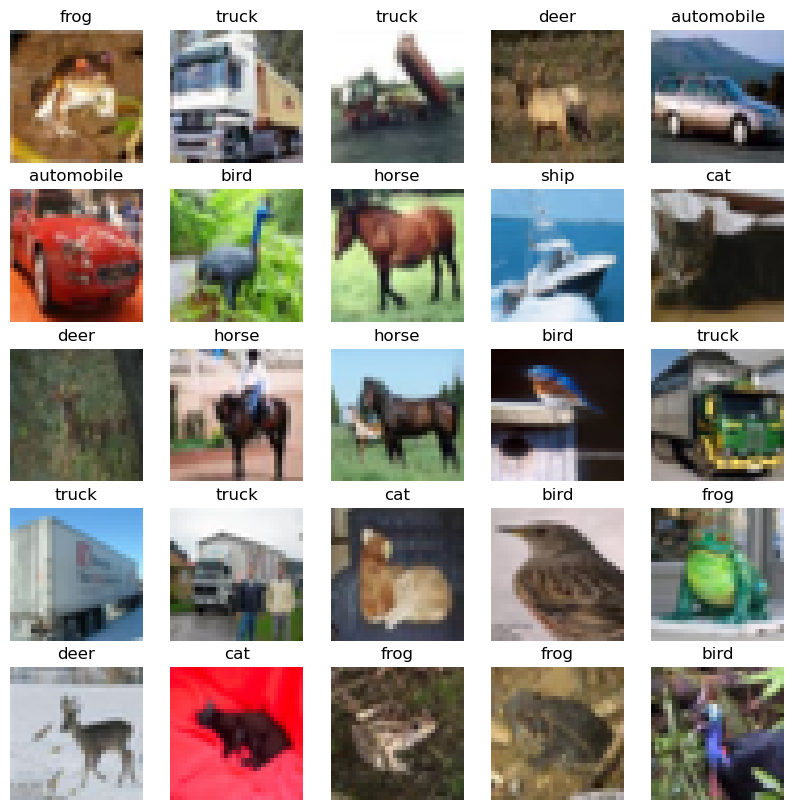

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.axis('off')
    plt.title(class_names[train_labels[i,0]])
plt.show()

In [7]:
dim = train_images.shape[1] * train_images.shape[2] * train_images.shape[3]

# Build an architecture

In [27]:
def create_nn():
    inputs = keras.Input(shape=train_images.shape[1:])
    # hidden layers
    x = keras.layers.Conv2D(50, (3,3), activation='relu')(inputs)
    x= keras.layers.MaxPooling2D((2,2))(x)
    x = keras.layers.Conv2D(50, (3,3), activation='relu')(x)
    x = keras.layers.MaxPooling2D((2,2))(x)
    x = keras.layers.Conv2D(50, (3,3), activation='relu')(x)    
    x = keras.layers.Dropout(0.8)(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(50, activation='relu')(x)

    x = keras.layers.Flatten()(x)
    # output layer
    outputs = keras.layers.Dense(10)(x)

    # model
    return keras.Model(inputs=inputs, outputs=outputs, name='cifar_model_small')

In [19]:
model = create_nn()

In [20]:
model.summary()

Model: "cifar_model_small"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 50)        1400      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 50)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 50)        22550     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 50)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1800)        

In [29]:
def compile_model(model):
    model.compile(optimizer='adam',
                  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [24]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images,test_labels))

Epoch 1/10
157/157 [==============================] - 6s 33ms/step - loss: 2.0782 - accuracy: 0.2368 - val_loss: 1.8616 - val_accuracy: 0.3187
Epoch 2/10
157/157 [==============================] - 4s 28ms/step - loss: 1.7294 - accuracy: 0.3714 - val_loss: 1.7027 - val_accuracy: 0.3714
Epoch 3/10
157/157 [==============================] - 4s 28ms/step - loss: 1.5640 - accuracy: 0.4352 - val_loss: 1.5336 - val_accuracy: 0.4527
Epoch 4/10
157/157 [==============================] - 4s 28ms/step - loss: 1.4570 - accuracy: 0.4806 - val_loss: 1.5211 - val_accuracy: 0.4493
Epoch 5/10
157/157 [==============================] - 4s 28ms/step - loss: 1.3492 - accuracy: 0.5206 - val_loss: 1.4386 - val_accuracy: 0.4858
Epoch 6/10
157/157 [==============================] - 4s 28ms/step - loss: 1.2697 - accuracy: 0.5486 - val_loss: 1.3739 - val_accuracy: 0.5132
Epoch 7/10
157/157 [==============================] - 4s 28ms/step - loss: 1.2031 - accuracy: 0.5740 - val_loss: 1.3684 - val_accuracy: 0.5109

<AxesSubplot: >

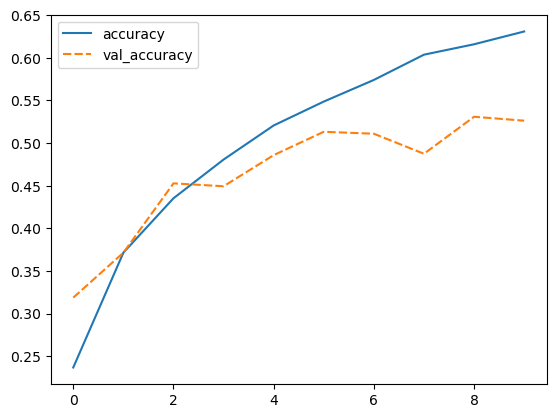

In [25]:
import seaborn as sns
import pandas as pd

history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])

<AxesSubplot: >

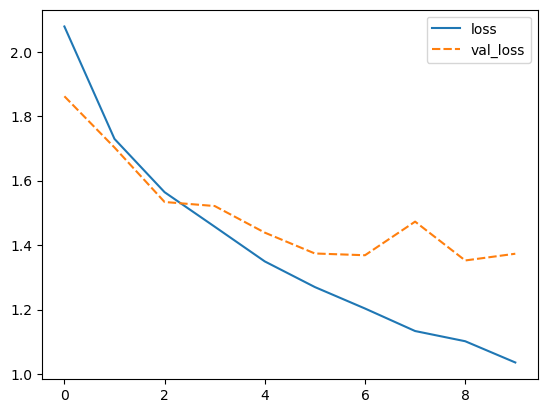

In [26]:
sns.lineplot(data=history_df[['loss', 'val_loss']])

# Dropout layers

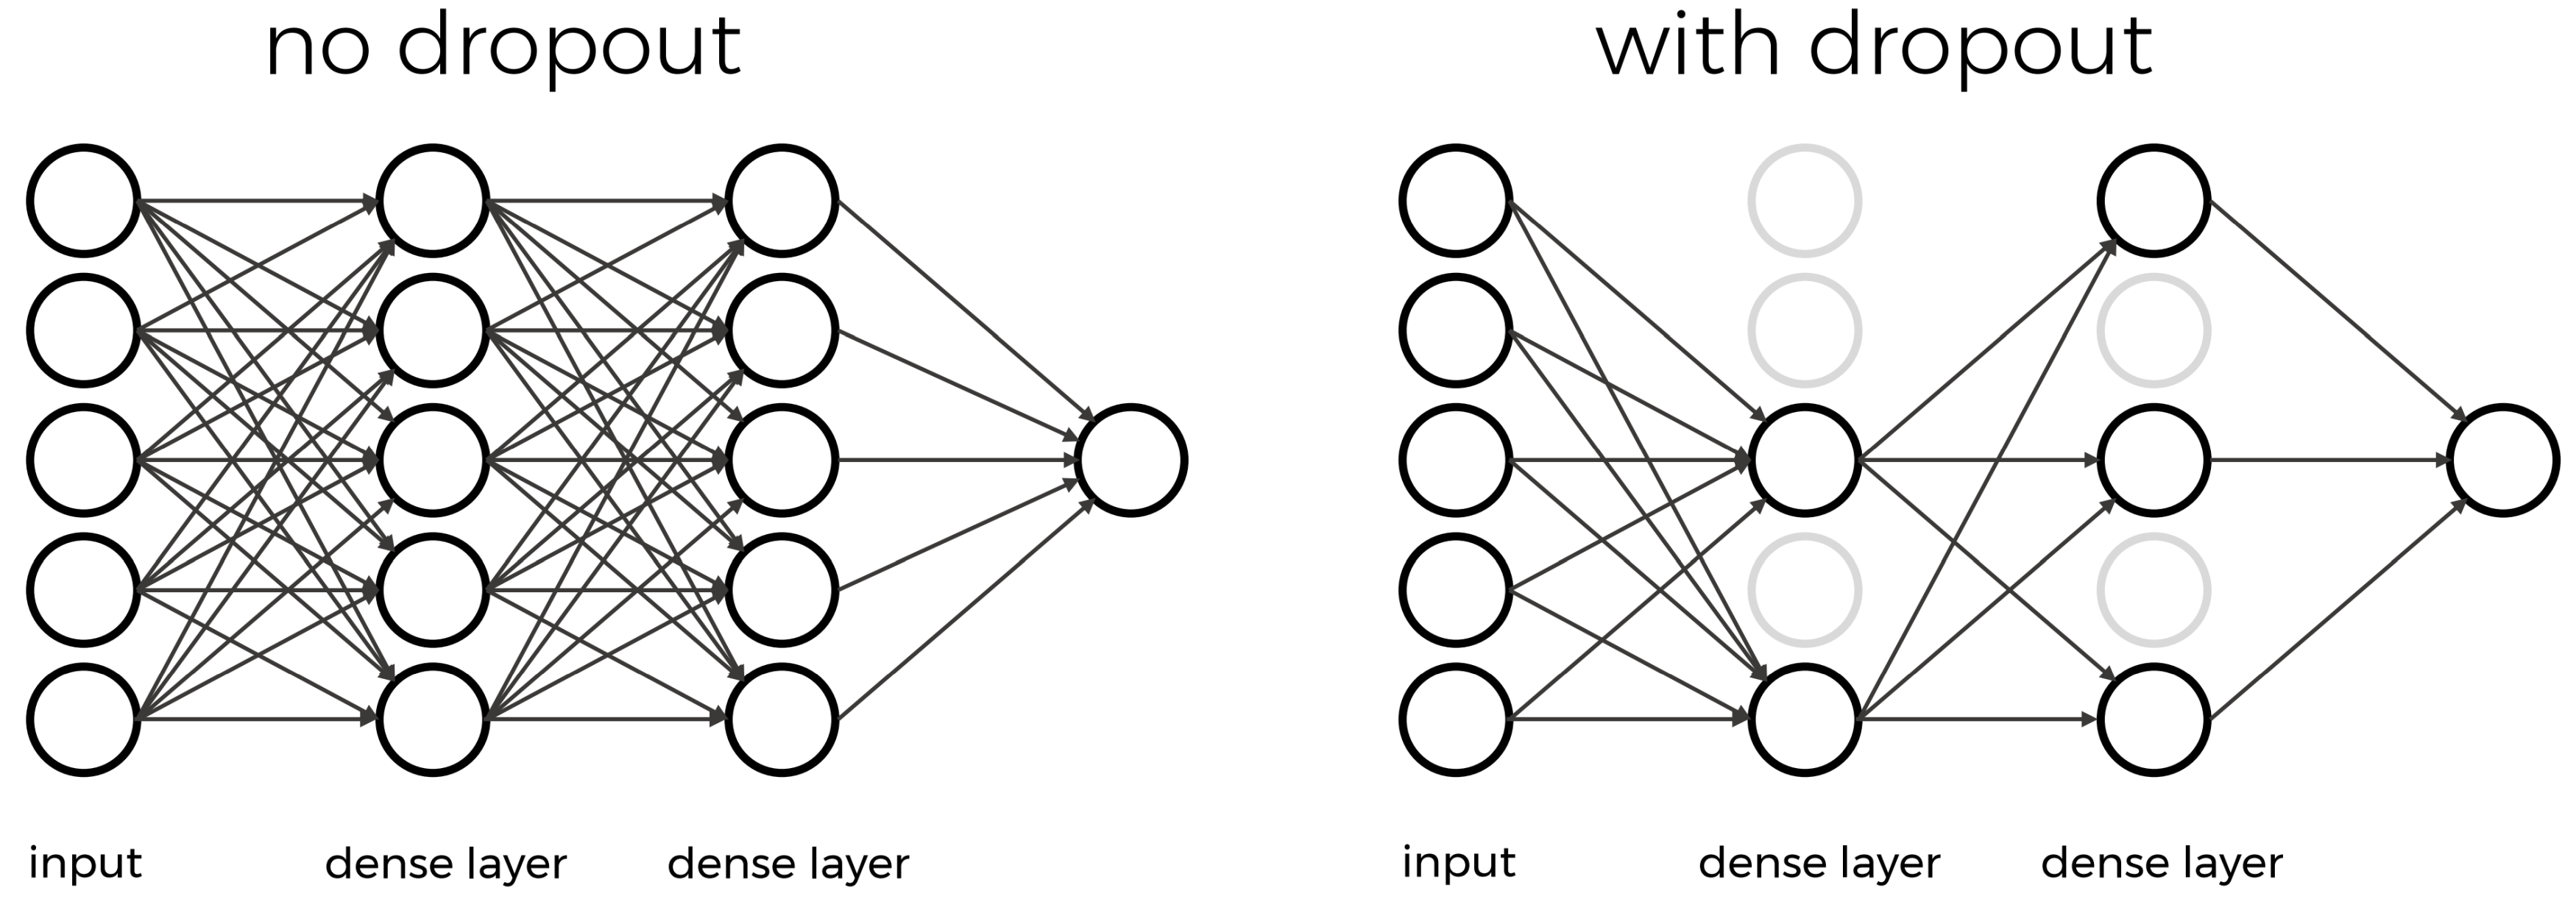


Dropout rate: between 0 and 1

In [30]:
model = create_nn()
compile_model(model)
model.summary()

Model: "cifar_model_small"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 50)        1400      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 50)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 50)        22550     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 50)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 50)    

In [31]:
history_dropout = model.fit(train_images, train_labels, epochs=20,
                            validation_data=(test_images, test_labels))

Epoch 1/20
157/157 [==============================] - 7s 39ms/step - loss: 2.2780 - accuracy: 0.1228 - val_loss: 2.1752 - val_accuracy: 0.1890
Epoch 2/20
157/157 [==============================] - 5s 35ms/step - loss: 2.0976 - accuracy: 0.1972 - val_loss: 1.9858 - val_accuracy: 0.2301
Epoch 3/20
157/157 [==============================] - 5s 35ms/step - loss: 1.9572 - accuracy: 0.2506 - val_loss: 1.8772 - val_accuracy: 0.2906
Epoch 4/20
157/157 [==============================] - 6s 36ms/step - loss: 1.8534 - accuracy: 0.3012 - val_loss: 1.7632 - val_accuracy: 0.3614
Epoch 5/20
157/157 [==============================] - 5s 35ms/step - loss: 1.7755 - accuracy: 0.3318 - val_loss: 1.6582 - val_accuracy: 0.3836
Epoch 6/20
157/157 [==============================] - 6s 38ms/step - loss: 1.7086 - accuracy: 0.3650 - val_loss: 1.6086 - val_accuracy: 0.4152
Epoch 7/20
157/157 [==============================] - 5s 35ms/step - loss: 1.6607 - accuracy: 0.3830 - val_loss: 1.5826 - val_accuracy: 0.4202

313/313 - 2s - loss: 1.3963 - accuracy: 0.5061 - 2s/epoch - 6ms/step


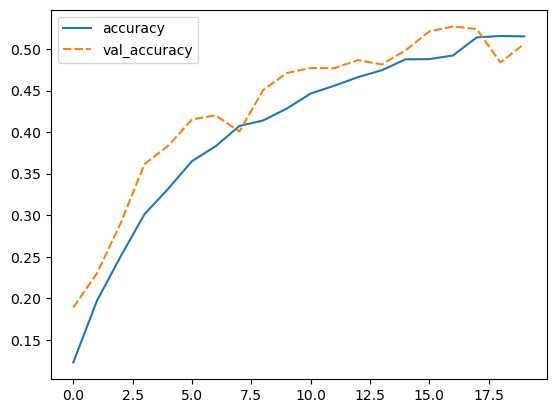

In [32]:
history_dropout_df = pd.DataFrame.from_dict(history_dropout.history)
sns.lineplot(data=history_dropout_df[['accuracy', 'val_accuracy']])

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

<AxesSubplot: >

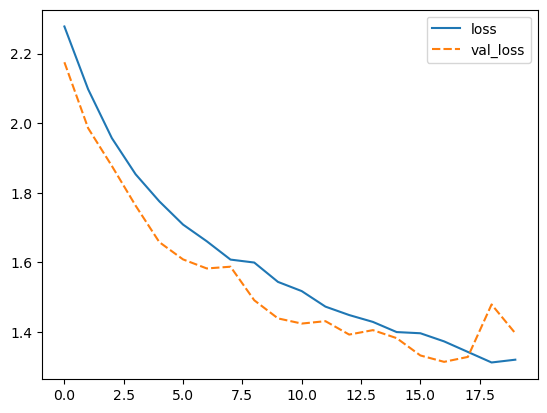

In [33]:
sns.lineplot(data=history_dropout_df[['loss', 'val_loss']])

In [37]:
preditions = model.predict(test_images)

313/313 [==============================] - 2s 6ms/step


In [38]:
preditions[0]

array([-0.06533639, -0.62976605,  0.41685075,  0.9123291 , -1.7827688 ,
       -0.29591036, -0.01222385, -1.6707062 ,  1.1268052 ,  0.44499618],
      dtype=float32)

In [40]:
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']